In [ ]:
import sklearn.datasets as dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/iris/

[Errno 2] No such file or directory: 'drive/MyDrive/iris/'
/content/drive/MyDrive/iris


In [ ]:
data = pd.read_csv('Iris.csv')

In [ ]:
data = pd.DataFrame(data)
data.set_index('Id',drop=True,inplace=True)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Y = data['Species']
X = data.drop('Species',axis=1)

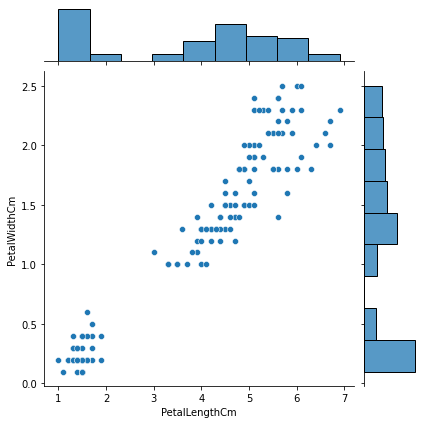

In [ ]:
#visualizing data
sns.jointplot(x=X['PetalLengthCm'],y=X['PetalWidthCm'])

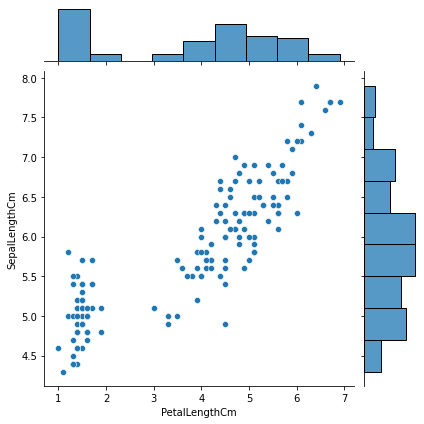

In [ ]:
sns.jointplot(x=X['PetalLengthCm'],y=X['SepalLengthCm'])

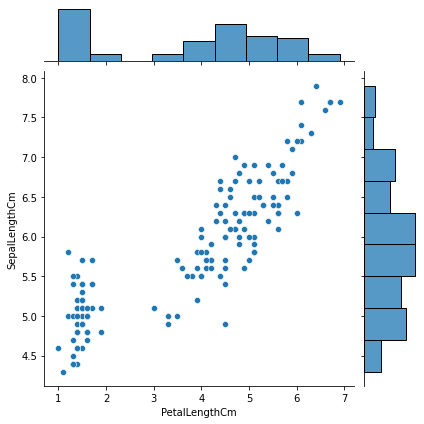

In [ ]:
sns.jointplot(x=X['PetalLengthCm'],y=X['SepalLengthCm'])

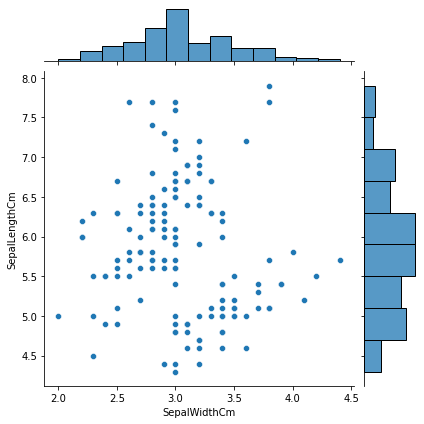

In [ ]:
sns.jointplot(x=X['SepalWidthCm'],y=X['SepalLengthCm'])

In [ ]:
#splitting data to check accuracy on gini entropy and entropy
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)

In [ ]:
#trying gini as criterion
classifiergini = dtc(criterion = 'gini')
classifiergini.fit(xtrain,ytrain)
ypred= classifiergini.predict(xtest)
confusion_matrix(ytest,ypred)

array([[10,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 14]])

In [ ]:
#trying entropy as criterion
classifierentropy = dtc(criterion = 'entropy')
classifierentropy.fit(xtrain,ytrain)
ypred= classifierentropy.predict(xtest)
confusion_matrix(ytest,ypred)

array([[10,  0,  0],
       [ 0, 20,  1],
       [ 0,  0, 14]])

In [ ]:
#we see that using entropy as criterion we get slightly better results

In [ ]:
#final model
classifier = dtc(criterion = 'entropy')
classifier.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(558.0, 996.6, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(472.15384615384613, 815.4000000000001, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(643.8461538461538, 815.4000000000001, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(343.38461538461536, 634.2, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(171.69230769230768, 453.0, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(85.84615384615384, 271.79999999999995, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(257.53846153846155, 271.79999999999995, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 453.0, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 271.79999999999995, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 271.79999999999995, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 

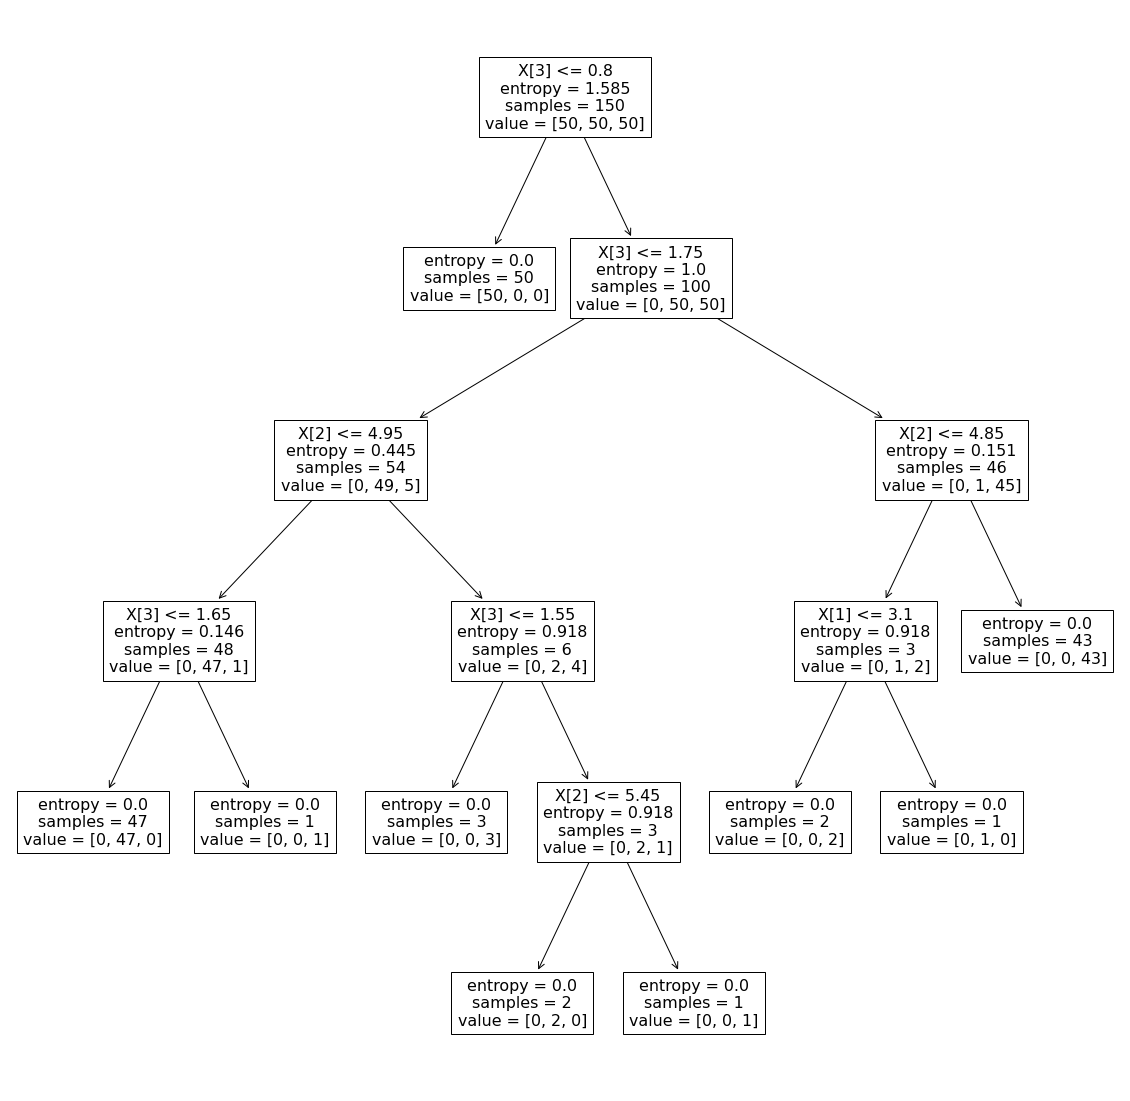

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(classifier,filled=True)